In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette="coolwarm", style="whitegrid")

In [3]:
base_dir = os.path.dirname(os.getcwd()) 
file_path = os.path.join(base_dir, 'csv files', 'Competition_Results.csv')

df = pd.read_csv(file_path)

In [4]:
competition_map={
    'SEG001' : 'men_short',
    'SEG002' : 'men_free',
    'SEG003' : 'women_short',
    'SEG004' : 'women_free',
    'data130' : 'men_short',
    'data150' : 'men_free',
    'data230' : 'women_short',
    'data250' : 'women_free'
}

In [5]:
def add_segment(val):
    for key in competition_map.keys():
        if key in val:
            return competition_map[key]

In [6]:
df['segment'] = df['competition'].apply(add_segment)
df['gender'] = df['segment'].str.extract(r'(men|women)')
df['short_free'] = df['segment'].str.extract(r'(short|free)')
df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,Judge No.9,final_element_score,segment,gender,short_free
0,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,4S+2T,...,2.0,3.0,1.0,2.0,2.0,3.0,13.22,men_short,men,short
1,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3F,...,2.0,3.0,2.0,3.0,2.0,4.0,6.66,men_short,men,short
2,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,FSSp4,...,3.0,4.0,3.0,3.0,2.0,3.0,3.86,men_short,men,short
3,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3A,...,4.0,3.0,2.0,2.0,3.0,4.0,11.09,men_short,men,short
4,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,StSq4,...,4.0,4.0,3.0,4.0,3.0,4.0,5.35,men_short,men,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,1.0,0.0,0.0,0.0,0.0,0.0,5.11,women_free,women,free
23479,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Sq+2T,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,4.01,women_free,women,free
23480,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,LSp2,...,1.0,1.0,0.0,1.0,1.0,-1.0,2.06,women_free,women,free
23481,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,StSq3,...,0.0,0.0,1.0,-1.0,0.0,-2.0,3.30,women_free,women,free


## Total Scores


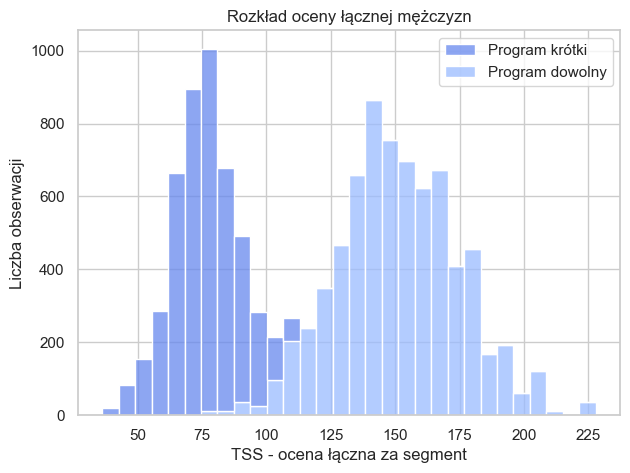

In [7]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=df[df['gender'] == 'men'], ax=ax, multiple='stack',
             x='total', kde=False,
             hue='short_free',
             legend=True)
ax.set_title('Rozkład oceny łącznej mężczyzn')
ax.set_xlabel('TSS - ocena łączna za segment')
ax.set_ylabel('Liczba obserwacji')

custom_labels = {'short': 'Program krótki', 'free': 'Program dowolny'}

legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        original_label = text.get_text()
        new_label = custom_labels.get(original_label, original_label)
        text.set_text(new_label)
    legend.set_title(None)
    legend.set_bbox_to_anchor((1, 1))

plt.show()

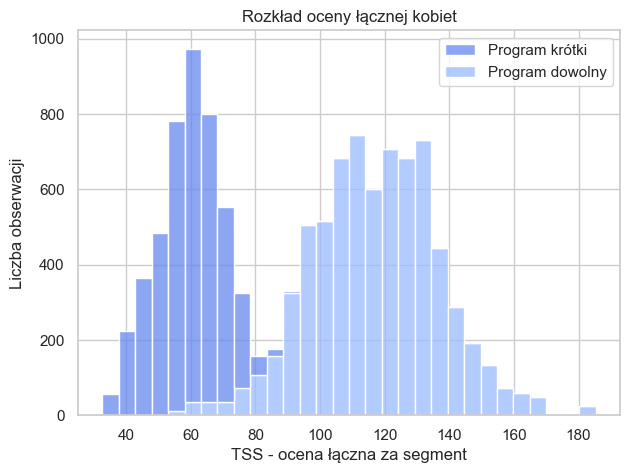

In [8]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=df[df['gender'] == 'women'], ax=ax, multiple='stack',
             x='total', kde=False,
             hue='short_free',
             legend=True)
ax.set_title('Rozkład oceny łącznej kobiet')
ax.set_xlabel('TSS - ocena łączna za segment')
ax.set_ylabel('Liczba obserwacji')

custom_labels = {'short': 'Program krótki', 'free': 'Program dowolny'}

legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        original_label = text.get_text()
        new_label = custom_labels.get(original_label, original_label)
        text.set_text(new_label)
    legend.set_title(None)
    legend.set_bbox_to_anchor((1, 1))

plt.show()

## GOEs, Base Value

<function matplotlib.pyplot.show(close=None, block=None)>

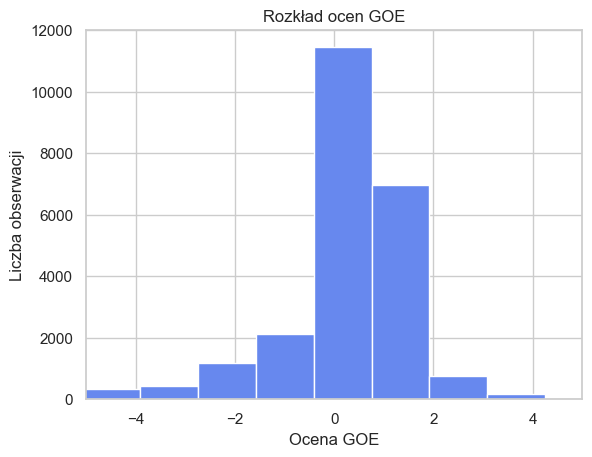

In [9]:
plt.hist(df['goe'])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')
plt.show

In [10]:
base_values = df.groupby(['name', 'competition']).agg({
    'base_value' : 'sum',
    'gender' : 'first',
    'short_free' : 'first'
}).reset_index()

base_values

,name,competition,base_value,gender,short_free
0,Adam HAGARA,ec2022SEG001OF,35.33,men,short
1,Adam HAGARA,ec2023SEG001OF,35.73,men,short
2,Adam HAGARA,ec2023SEG002OF,65.12,men,free
3,Adam HAGARA,ec2024SEG001OF,36.59,men,short
4,Adam HAGARA,ec2024SEG002OF,71.12,men,free
...,...,...,...,...,...
2494,Ze Zeng FANG,fc2024SEG002OF,53.04,men,free
2495,Ze Zeng FANG,fc2025SEG001OF,26.35,men,short
2496,Ze Zeng FANG,fc2025SEG002OF,59.37,men,free
2497,Zhiming PENG,fc2025SEG001OF,39.50,men,short


In [11]:
men_short_bv = (base_values['gender'] == 'men') & (base_values['short_free'] == 'short')
men_free_bv = (base_values['gender'] == 'men') & (base_values['short_free'] == 'free')
women_short_bv = (base_values['gender'] == 'women') & (base_values['short_free'] == 'short')
women_free_bv = (base_values['gender'] ==   'women') & (base_values['short_free'] == 'free')

In [12]:
med1 = base_values.loc[men_short_bv, 'base_value'].median()
med2 = base_values.loc[men_free_bv, 'base_value'].median()
med3 = base_values.loc[women_short_bv, 'base_value'].median()
med4 = base_values.loc[women_free_bv, 'base_value'].median()

med1, med2, med3, med4

(np.float64(37.800000000000004),
 np.float64(71.51),
 np.float64(28.91),
 np.float64(56.43))

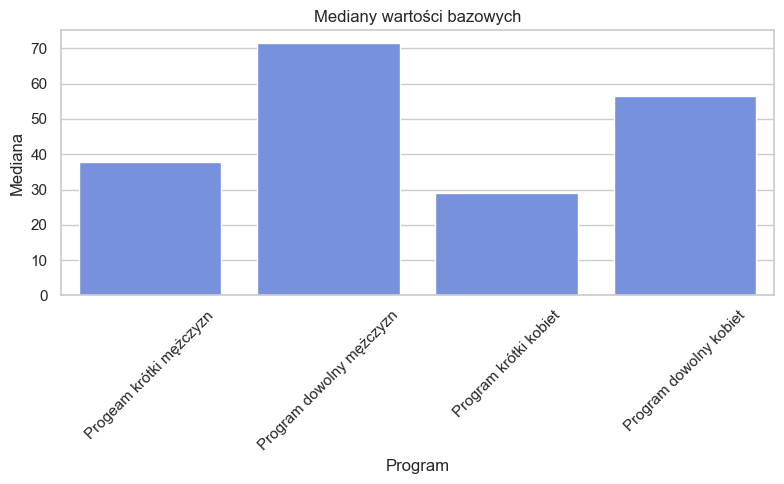

In [13]:
medians = {
    'Progeam krótki mężczyzn': med1,
    'Program dowolny mężczyzn': med2,
    'Program krótki kobiet': med3,
    'Program dowolny kobiet': med4
}

df_for_med = pd.DataFrame(list(medians.items()), columns=['Program', 'Mediana'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Program', y='Mediana', data=df_for_med)

plt.xticks(rotation=45)
plt.title('Mediany wartości bazowych')
plt.tight_layout()
plt.show()

In [14]:
jumps = ['A', 'Lo', 'S', 'T', 'F', 'Lz']
spins = ['Sp']
steps = ['StSq']
choreo = ['ChSq']

In [15]:
non_jumps = spins + steps + choreo
pattern = '|'.join(non_jumps)
jumps_df = df[~df['element'].str.contains(pattern, na=False)]
jumps_df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,Judge No.9,final_element_score,segment,gender,short_free
0,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,4S+2T,...,2.0,3.0,1.0,2.0,2.0,3.0,13.22,men_short,men,short
1,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3F,...,2.0,3.0,2.0,3.0,2.0,4.0,6.66,men_short,men,short
3,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3A,...,4.0,3.0,2.0,2.0,3.0,4.0,11.09,men_short,men,short
7,2,Dmitri ALIEV,RUS,31,88.45,47.17,41.28,0.0,ec2020SEG001OF,4Lz<+3T,...,-1.0,-1.0,0.0,-1.0,-1.0,0.0,12.87,men_short,men,short
8,2,Dmitri ALIEV,RUS,31,88.45,47.17,41.28,0.0,ec2020SEG001OF,4T,...,2.0,3.0,2.0,3.0,2.0,3.0,11.94,men_short,men,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23473,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Lz!,...,-1.0,0.0,0.0,1.0,-1.0,-1.0,5.39,women_free,women,free
23474,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3F,...,0.0,2.0,0.0,1.0,0.0,0.0,5.53,women_free,women,free
23477,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,1Lo,...,0.0,0.0,0.0,2.0,0.0,-1.0,0.55,women_free,women,free
23478,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,1.0,0.0,0.0,0.0,0.0,0.0,5.11,women_free,women,free


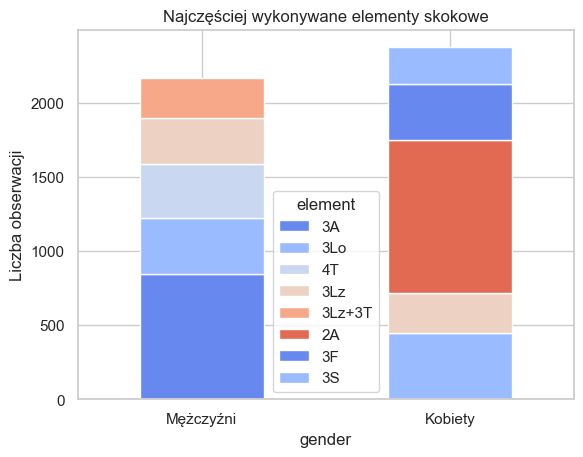

In [16]:
grouped = jumps_df.groupby('gender')['element'].value_counts().groupby(level=0).head(5).unstack()

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}
grouped.index = grouped.index.to_series().replace(custom_labels)

grouped.plot(kind='bar', stacked=True)

plt.title('Najczęściej wykonywane elementy skokowe')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

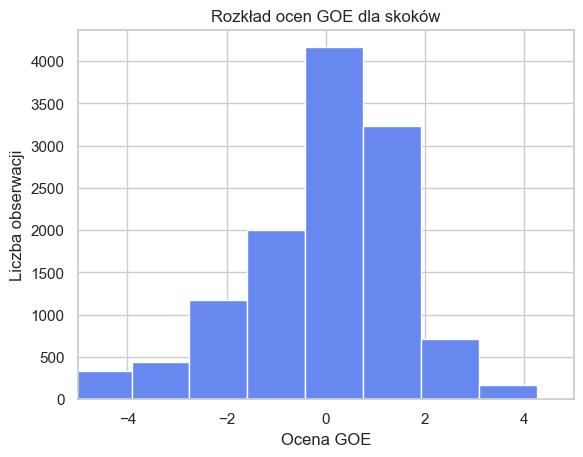

In [17]:
plt.hist(jumps_df['goe'])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE dla skoków')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

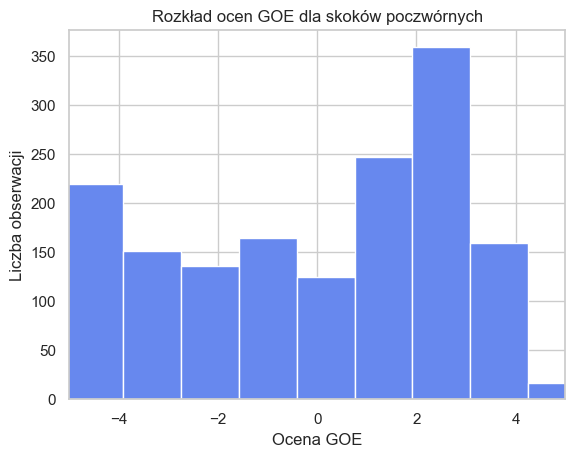

In [18]:
plt.hist(jumps_df[jumps_df['element'].str.contains('4')]['goe'])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE dla skoków poczwórnych')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

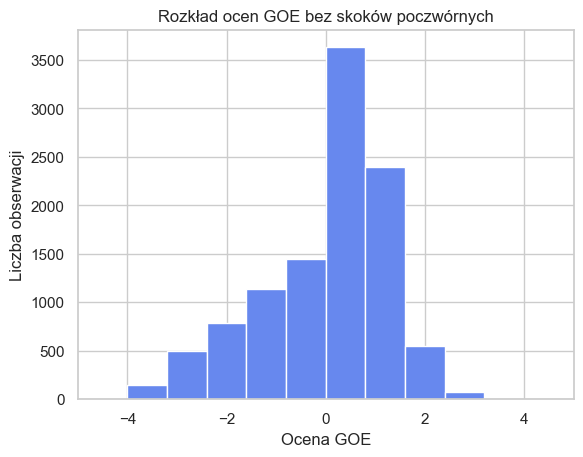

In [19]:
plt.hist(jumps_df[~jumps_df['element'].str.contains('4')]['goe'])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE bez skoków poczwórnych')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')
plt.show

Text(0, 0.5, 'Liczba obserwacji')

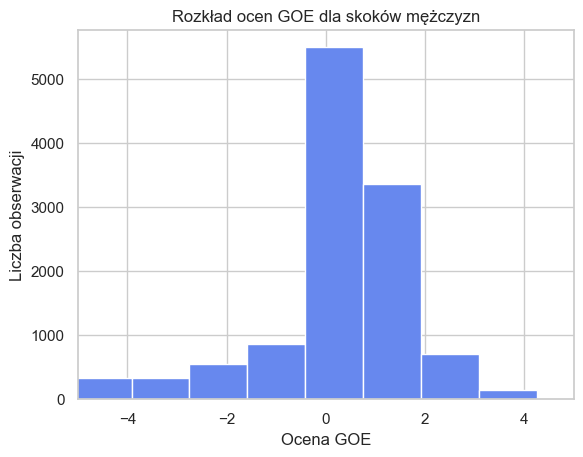

In [20]:
plt.hist(df['goe'][df['segment'].isin(['men_short', 'men_free'])])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE dla skoków mężczyzn')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')

Text(0, 0.5, 'Liczba obserwacji')

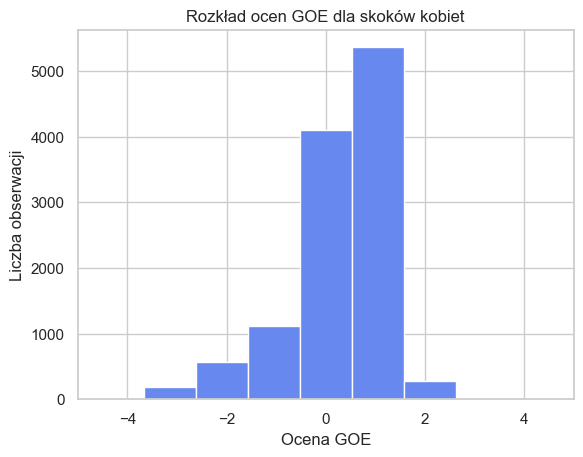

In [21]:
plt.hist(df['goe'][df['segment'].isin(['women_short', 'women_free'])])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE dla skoków kobiet')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')

In [22]:
len(df['competition'].unique())

161

## Winners

In [23]:
winners_df = df.loc[df.groupby('competition')['total'].idxmax()]
winners_df['year'] = winners_df['competition'].str.extract(r'(\d{4})')
winners_df.sort_values('year', inplace=True)
winners_df


,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.5,Judge No.6,Judge No.7,Judge No.8,Judge No.9,final_element_score,segment,gender,short_free,year
4795,1,Alena KOSTORNAIA,RUS,1,85.45,49.48,35.97,0.0,gpf2019SEG003OF,3A,...,3.0,4.0,4.0,5.0,4.0,10.97,women_short,women,short,2019
15911,1,Anna SHCHERBAKOVA,RUS,4,162.65,94.52,69.13,-1.0,gpf2019SEG004OF,4Lz+3T,...,3.0,2.0,3.0,3.0,3.0,19.15,women_free,women,free,2019
15143,1,Anna SHCHERBAKOVA,RUS,12,152.53,84.71,67.82,0.0,gpchn2019SEG004OF,4Lz!<+3T,...,-2.0,-2.0,-1.0,-1.0,0.0,12.48,women_free,women,free,2019
15839,1,Nathan CHEN,USA,6,224.92,129.14,95.78,0.0,gpf2019SEG002OF,4F+3T,...,4.0,5.0,5.0,4.0,5.0,20.23,men_free,men,free,2019
4753,1,Nathan CHEN,USA,4,110.38,63.13,47.25,0.0,gpf2019SEG001OF,4Lz,...,3.0,5.0,4.0,3.0,3.0,15.94,men_short,men,short,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,1,Alysa LIU,USA,18,74.58,40.80,33.78,0.0,wc2025SEG003OF,3F+3T,...,2.0,2.0,2.0,3.0,2.0,10.64,women_short,women,short,2025
8603,1,Ilia MALININ,USA,38,110.41,64.21,46.20,0.0,wc2025SEG001OF,4F,...,4.0,4.0,4.0,4.0,4.0,15.24,men_short,men,short,2025
22907,1,Ilia MALININ,USA,24,208.15,116.91,91.24,0.0,wc2025SEG002OF,4F,...,4.0,4.0,5.0,4.0,4.0,15.24,men_free,men,free,2025
3129,1,Mikhail SHAIDOROV,KAZ,22,94.73,55.78,38.95,0.0,fc2025SEG001OF,4Lz+3T,...,3.0,3.0,3.0,3.0,5.0,19.15,men_short,men,short,2025


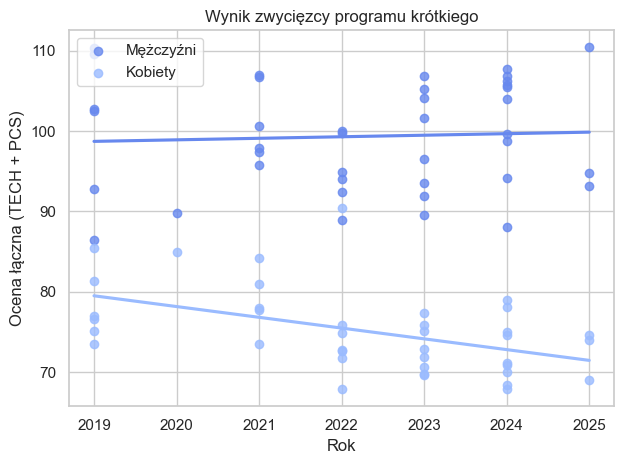

In [24]:
data = winners_df[winners_df['segment'].str.contains('short')].copy()
data['year'] = pd.to_numeric(data['year'])
data['total'] = pd.to_numeric(data['total'])

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

fig, ax = plt.subplots()

for gender, group_data in data.groupby('gender'):
    sns.regplot(
        data=group_data,
        x='year',
        y='total',
        label=custom_labels.get(gender, gender),
        ci=None,
        ax=ax
    )

ax.set_title('Wynik zwycięzcy programu krótkiego')
ax.set_xlabel('Rok')
ax.set_ylabel('Ocena łączna (TECH + PCS)')
ax.legend(title=None, loc='upper left')

plt.tight_layout()
plt.show()


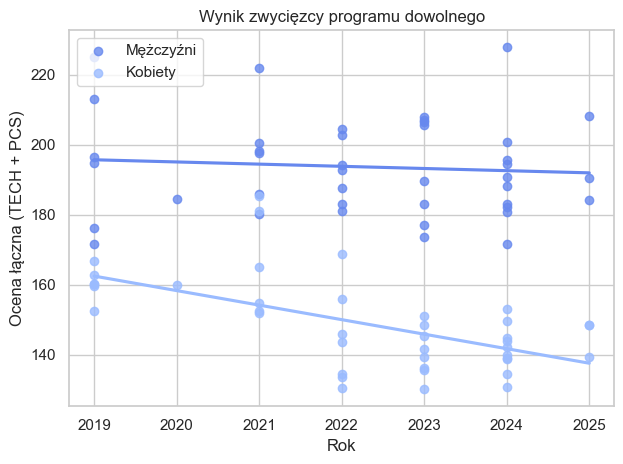

In [25]:
data = winners_df[winners_df['segment'].str.contains('free')].copy()
data['year'] = pd.to_numeric(data['year'])
data['total'] = pd.to_numeric(data['total'])

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

fig, ax = plt.subplots()

for gender, group_data in data.groupby('gender'):
    sns.regplot(
        data=group_data,
        x='year',
        y='total',
        label=custom_labels.get(gender, gender),
        ci=None,
        ax=ax
    )

ax.set_title('Wynik zwycięzcy programu dowolnego')
ax.set_xlabel('Rok')
ax.set_ylabel('Ocena łączna (TECH + PCS)')
ax.legend(title=None, loc='upper left')

plt.tight_layout()
plt.show()


## Scores contributors

In [26]:
df_distinct = df.drop_duplicates(subset=['name', 'competition'])
df_distinct.sort_values('name')

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,Judge No.9,final_element_score,segment,gender,short_free
10943,11,Adam HAGARA,SVK,14,145.85,76.85,69.00,0.0,ec2024SEG002OF,3A+2T,...,1.0,1.0,2.0,2.0,1.0,1.0,10.33,men_free,men,free
1463,11,Adam HAGARA,SVK,21,74.97,40.55,34.42,0.0,ec2024SEG001OF,3F+3T,...,1.0,2.0,2.0,2.0,2.0,2.0,10.48,men_short,men,short
11507,10,Adam HAGARA,SVK,12,147.08,76.34,70.74,0.0,ec2025SEG002OF,3A+2T,...,2.0,3.0,2.0,2.0,2.0,2.0,11.01,men_free,men,free
8722,18,Adam HAGARA,SVK,27,78.33,41.40,36.93,0.0,wc2025SEG001OF,3Lz+3T,...,2.0,2.0,3.0,2.0,2.0,2.0,11.28,men_short,men,short
672,25,Adam HAGARA,SVK,15,65.23,33.94,31.29,0.0,ec2022SEG001OF,3A,...,-2.0,-2.0,-1.0,-2.0,-2.0,-2.0,6.40,men_short,men,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,22,Ze Zeng FANG,MAS,6,46.37,22.44,25.93,-2.0,fc2025SEG001OF,3Lz,...,-3.0,-3.0,-1.0,-2.0,-2.0,-3.0,4.64,men_short,men,short
12731,21,Ze Zeng FANG,MAS,1,103.35,50.97,53.38,-1.0,fc2024SEG002OF,3Lo+2T,...,0.0,1.0,0.0,0.0,0.0,0.0,6.27,men_free,men,free
2912,23,Ze Zeng FANG,MAS,1,54.99,27.92,27.07,0.0,fc2024SEG001OF,3T+3T,...,0.0,0.0,1.0,0.0,0.0,0.0,8.46,men_short,men,short
13235,15,Zhiming PENG,CHN,13,128.75,67.91,61.84,-1.0,fc2025SEG002OF,3A+2T,...,0.0,1.0,0.0,1.0,1.0,0.0,9.99,men_free,men,free


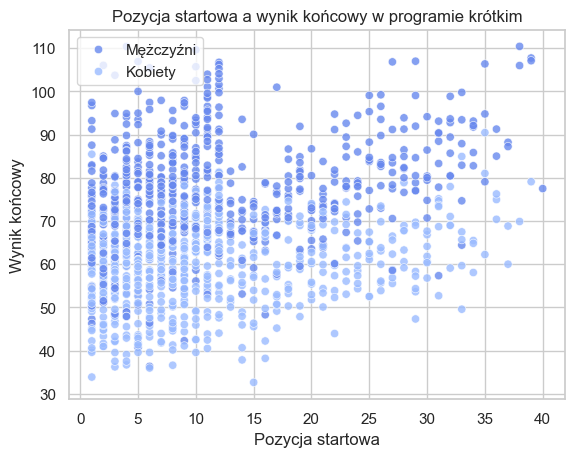

In [27]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_distinct[df_distinct['short_free'] == 'short'], 
                x=df_distinct['startnr'], 
                y=df_distinct['total'], 
                hue='gender', 
                alpha=0.8, 
                ax=ax)

plt.xlabel('Pozycja startowa')
plt.ylabel('Wynik końcowy')
plt.title('Pozycja startowa a wynik końcowy w programie krótkim')

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

handles, labels = ax.get_legend_handles_labels()
labels = [custom_labels.get(label, label) for label in labels]
plt.legend(handles=handles, labels=labels, title=None, loc='upper left')

plt.grid(True)
plt.show()

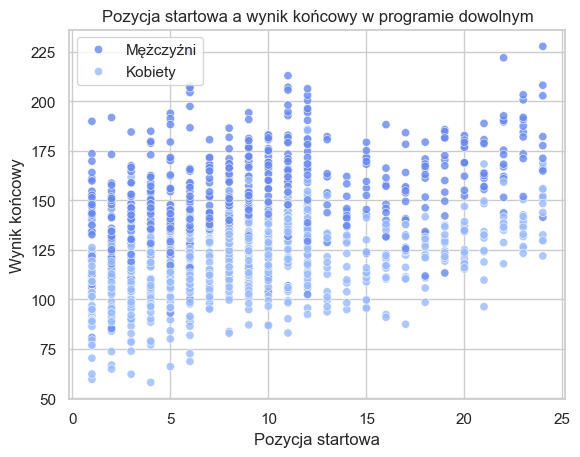

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_distinct[df_distinct['short_free'] == 'free'], 
                x=df_distinct['startnr'], 
                y=df_distinct['total'], 
                hue='gender', 
                alpha=0.8, 
                ax=ax)

plt.xlabel('Pozycja startowa')
plt.ylabel('Wynik końcowy')
plt.title('Pozycja startowa a wynik końcowy w programie dowolnym')

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

handles, labels = ax.get_legend_handles_labels()
labels = [custom_labels.get(label, label) for label in labels]
plt.legend(handles=handles, labels=labels, title=None, loc='upper left')

plt.grid(True)
plt.show()

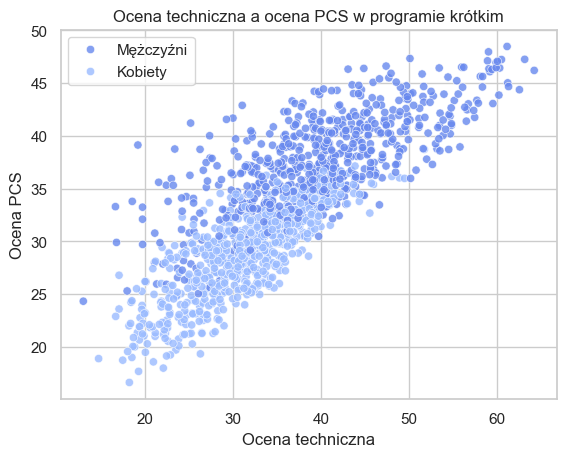

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_distinct[df_distinct['short_free'] == 'short'], 
                x=df_distinct['tech'], 
                y=df_distinct['pcs'], 
                hue='gender', 
                alpha=0.8, 
                ax=ax)

plt.xlabel('Ocena techniczna')
plt.ylabel('Ocena PCS')
plt.title('Ocena techniczna a ocena PCS w programie krótkim')

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

handles, labels = ax.get_legend_handles_labels()
labels = [custom_labels.get(label, label) for label in labels]
plt.legend(handles=handles, labels=labels, title=None, loc='upper left')

plt.grid(True)
plt.show()

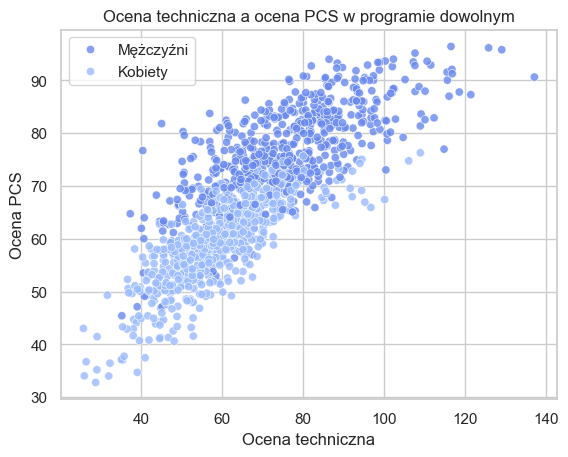

In [30]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_distinct[df_distinct['short_free'] == 'free'], 
                x=df_distinct['tech'], 
                y=df_distinct['pcs'], 
                hue='gender', 
                alpha=0.8, 
                ax=ax)

plt.xlabel('Ocena techniczna')
plt.ylabel('Ocena PCS')
plt.title('Ocena techniczna a ocena PCS w programie dowolnym')

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

handles, labels = ax.get_legend_handles_labels()
labels = [custom_labels.get(label, label) for label in labels]
plt.legend(handles=handles, labels=labels, title=None, loc='upper left')

plt.grid(True)
plt.show()

## Jumps Values

In [31]:
# for distinct name and competition sum values for skaters jumps and caclulate percenatge of the total score, the mean/median
jumps_value = jumps_df.groupby(['name', 'competition']).agg(
    {
        'final_element_score' : 'sum',
        'total' : 'first',
        'rank' : 'first',
        'short_free' : 'first'
    }
).reset_index()

percentage_jumps_value_s = (jumps_value[jumps_value['short_free'] == 'short']['final_element_score'] / jumps_value['total']) * 100
percentage_jumps_value_f = (jumps_value[jumps_value['short_free'] == 'free']['final_element_score'] / jumps_value['total']) * 100

percentage_jumps_value_s.sort_values(), percentage_jumps_value_f.sort_values()

(1256     8.670520
 917      8.673350
 731     10.502656
 1165    10.869565
 923     11.599697
           ...    
 2490          NaN
 2492          NaN
 2494          NaN
 2496          NaN
 2498          NaN
 Length: 2499, dtype: float64,
 346     16.222688
 1172    17.338282
 2380    20.444889
 2161    21.888067
 1534    22.008253
           ...    
 2489          NaN
 2491          NaN
 2493          NaN
 2495          NaN
 2497          NaN
 Length: 2499, dtype: float64)

In [32]:
jumps_value

,name,competition,final_element_score,total,rank,short_free
0,Adam HAGARA,ec2022SEG001OF,21.79,65.23,25,short
1,Adam HAGARA,ec2023SEG001OF,23.02,65.15,21,short
2,Adam HAGARA,ec2023SEG002OF,54.34,124.57,15,free
3,Adam HAGARA,ec2024SEG001OF,26.89,74.97,11,short
4,Adam HAGARA,ec2024SEG002OF,60.16,145.85,11,free
...,...,...,...,...,...,...
2494,Ze Zeng FANG,fc2024SEG002OF,34.86,103.35,21,free
2495,Ze Zeng FANG,fc2025SEG001OF,12.17,46.37,22,short
2496,Ze Zeng FANG,fc2025SEG002OF,40.53,105.66,21,free
2497,Zhiming PENG,fc2025SEG001OF,28.99,70.21,10,short


In [33]:
jumps_value = jumps_value[jumps_value['rank'].isin([1, 2, 3])]
jumps_value

,name,competition,final_element_score,total,rank,short_free
12,Adam SIAO HIM FA,ec2023SEG001OF,34.76,96.53,1,short
13,Adam SIAO HIM FA,ec2023SEG002OF,64.06,171.24,2,free
14,Adam SIAO HIM FA,ec2024SEG001OF,32.12,94.13,1,short
15,Adam SIAO HIM FA,ec2024SEG002OF,73.97,182.04,1,free
16,Adam SIAO HIM FA,ec2025SEG001OF,31.94,93.12,1,short
...,...,...,...,...,...,...
2487,Yuzuru HANYU,gpcan2019SEG001OF,43.10,109.60,1,short
2488,Yuzuru HANYU,gpcan2019SEG002OF,93.06,212.99,1,free
2489,Yuzuru HANYU,gpf2019SEG001OF,31.33,97.43,2,short
2490,Yuzuru HANYU,gpf2019SEG002OF,77.81,194.00,2,free
